In [182]:
import pandas as pd
%matplotlib inline

mdl = pd.read_csv('dataset/DSProjectData.csv', skipinitialspace=True, low_memory=False)

In [183]:
mdl['Date']=pd.to_datetime(mdl['Date'])

In [184]:
mdl.head().sort_values('Date')

,Server Name,Week,CPU %,RAM,Date
0,CALBIPRD01,Wk 1,0.2260,6.2,2017-01-07
1,CALBIPRD01,Wk 2,0.1264,6.2,2017-01-14
2,CALBIPRD01,Wk 3,0.4300,5.6,2017-01-21
3,CALBIPRD01,Wk 4,0.0850,5.7,2017-01-28
4,CALBIPRD01,Wk 5,0.1200,6.2,2017-02-04


In [185]:
mdl01=mdl[mdl['Server Name']=='CALBIPRD01']

<B>CALPBPRD01 CPU %<B>

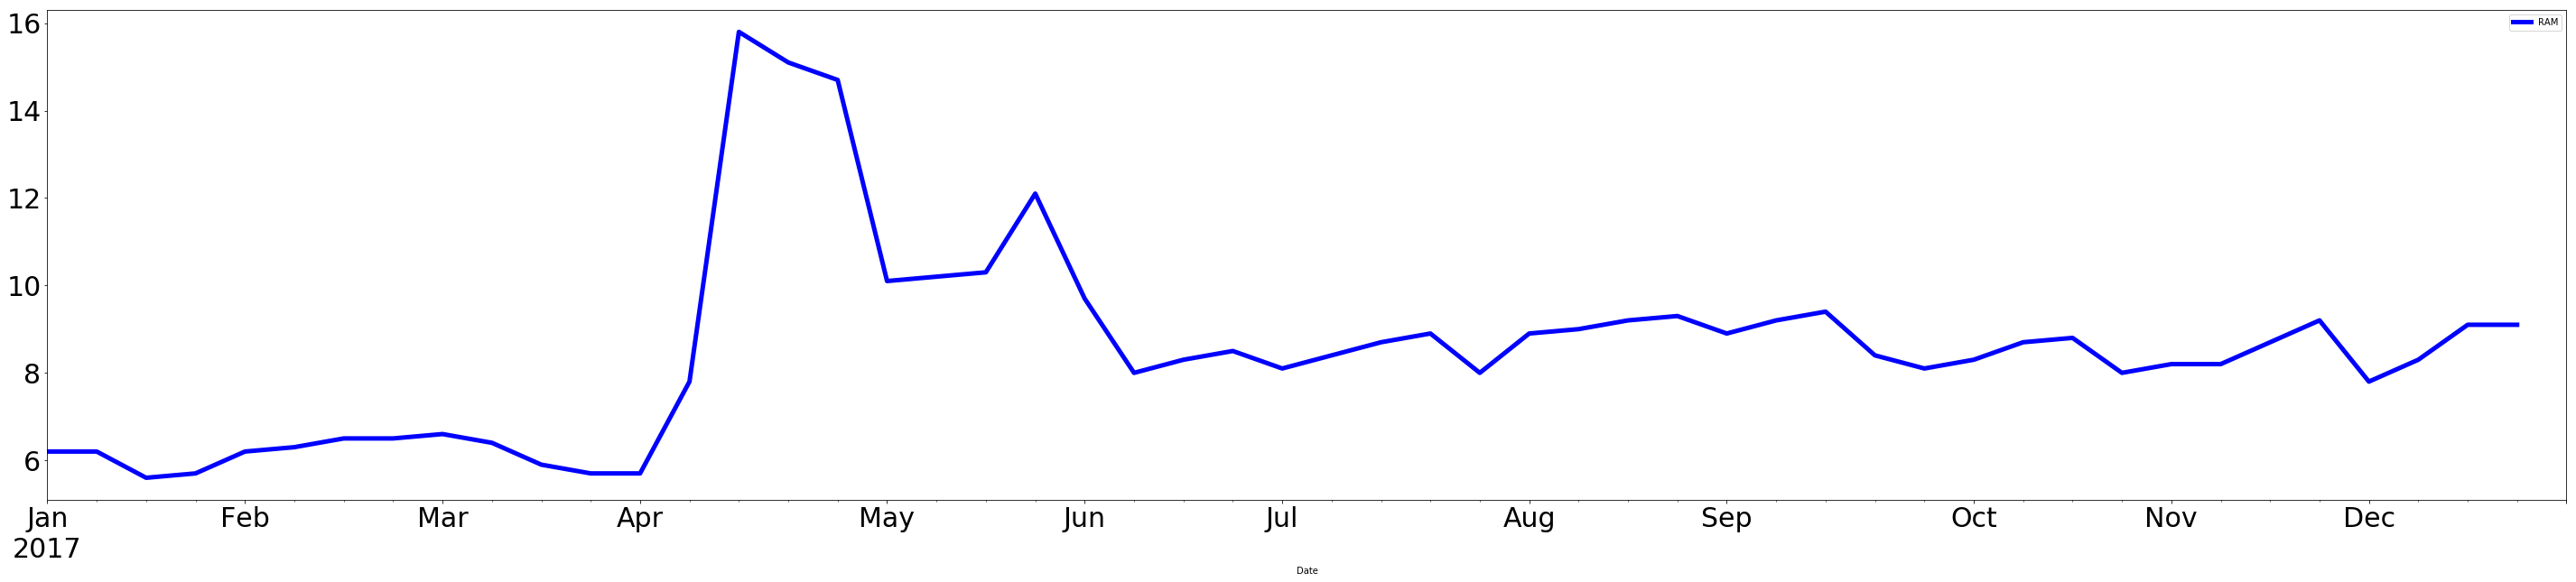

In [186]:
mdl01.plot(kind='line', figsize=(50,10), fontsize=30 , legend=True, linewidth=5.0, x='Date', y='RAM', color ='blue')

In [187]:
mdl01.set_index('Date', inplace=True)
mdl01['Month']= mdl01.index.month
mdl01['Day']=mdl01.index.day

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [188]:
mdl01.head()

,Server Name,Week,CPU %,RAM,Month,Day
Date,,,,,,
2017-01-07,CALBIPRD01,Wk 1,0.2260,6.2,1,7
2017-01-14,CALBIPRD01,Wk 2,0.1264,6.2,1,14
2017-01-21,CALBIPRD01,Wk 3,0.4300,5.6,1,21
2017-01-28,CALBIPRD01,Wk 4,0.0850,5.7,1,28
2017-02-04,CALBIPRD01,Wk 5,0.1200,6.2,2,4


<B>CALBIPRD01 CPU% (Rolling One Month)</B>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


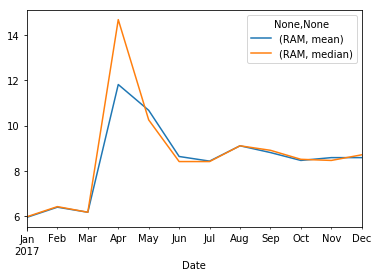

In [189]:
mdl01[['RAM']].resample('M', how =['mean','median']).rolling(window =1, center =True).mean().plot()
#eda_time01[['RAM']].resample('M', how =['median','mean']).plot()

<b>Autocorrlation for CPU % - Week / Month Difference<b>

In [190]:
print 'CALBIPRD01 RAM Week Corr', mdl01['RAM'].dropna().resample('D').mean().autocorr(lag=7)
print 'CALBIPRD01 RAM Month Corr', mdl01['RAM'].resample('M').mean().autocorr(lag=1)

CALBIPRD01 RAM Week Corr 0.767088353787
CALBIPRD01 RAM Month Corr 0.355656845976


<b>Autocorrlation for CPU % - lags 1, 2, 3, 4, 5, 6, 7, 12, 24</b>
<br>Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless,
then the series does not need a higher order of differencing.</br>

In [191]:
#print 'lag =1 :', mdl01['RAM'].dropna().diff(1).dropna().autocorr(lag=1)
print 'lag =1 :', mdl01['RAM'].dropna().autocorr(lag=1)
print 'lag =2 :', mdl01['RAM'].dropna().autocorr(lag=2)
print 'lag =3 :', mdl01['RAM'].dropna().autocorr(lag=3)
print 'lag =4 :', mdl01['RAM'].dropna().autocorr(lag=4)
print 'lag =5 :', mdl01['RAM'].dropna().autocorr(lag=5)
print 'lag =6 :', mdl01['RAM'].dropna().autocorr(lag=6)
print 'lag =7 :', mdl01['RAM'].dropna().autocorr(lag=7)
print 'lag =12 :', mdl01['RAM'].dropna().autocorr(lag=12)
print 'lag =24 :', mdl01['RAM'].dropna().autocorr(lag=24)
print 'lag =24 :', mdl01['RAM'].dropna().autocorr(lag=34)

lag =1 : 0.767088353787
lag =2 : 0.483051946537
lag =3 : 0.229474533558
lag =4 : 0.181119443382
lag =5 : 0.141176812022
lag =6 : 0.0657656873816
lag =7 : -0.0833556674342
lag =12 : -0.30918389982
lag =24 : -0.393632487736
lag =24 : 0.120441833818


<b> CALBIPRD01 CPU % Autocorrlation - Month Lag 1 to 11</b>

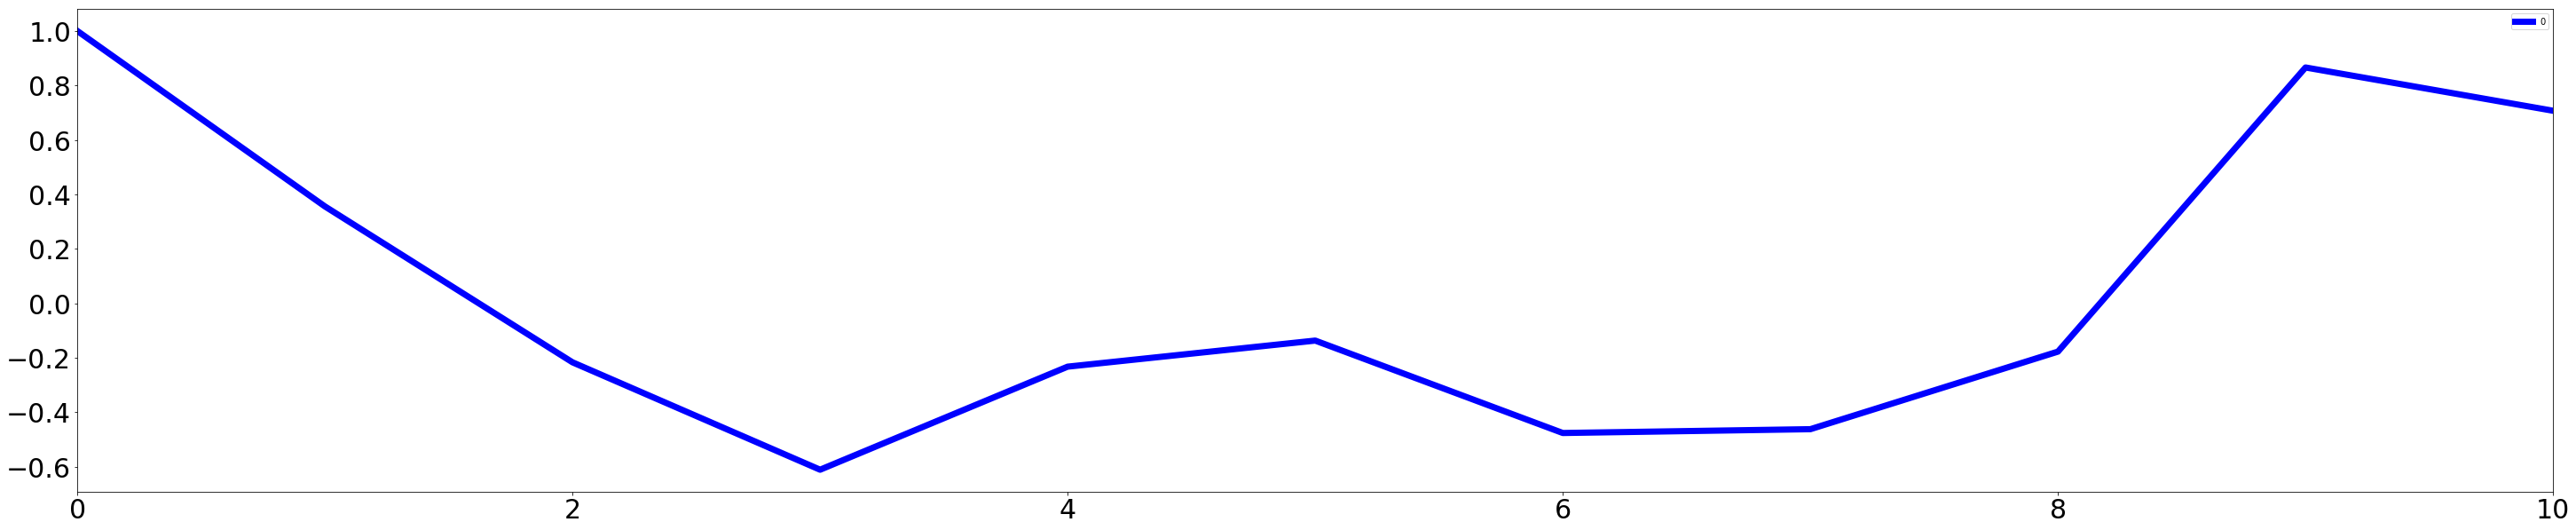

In [192]:
autoc = []

for i in range(11):
    autoc.append(mdl01['RAM'].resample('M').mean().autocorr(lag=1*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='blue', linewidth=7.0)

<b> CALBIPRD01 CPU % Autocorrlation - Week Lag 1 to 51</b>

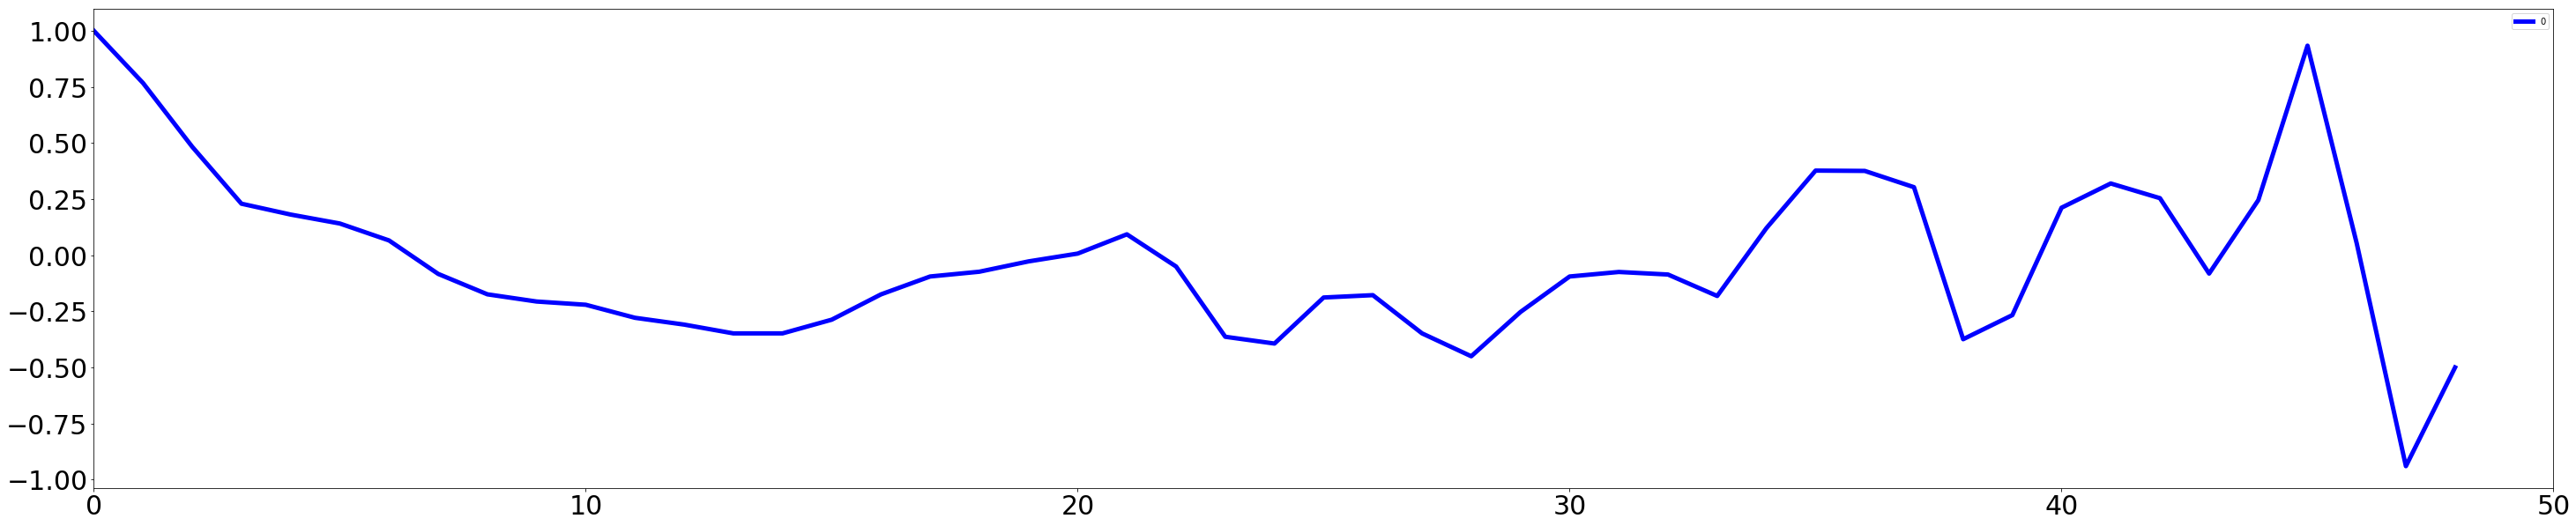

In [193]:
autoc = []

for i in range(51):
    autoc.append(mdl01['RAM'].resample('D').mean().autocorr(lag=7*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='blue', linewidth=5.0)

<b>This shows a typical pattern of an autocorrelation plot, that it should
decrease to 0 as lag increases.</b>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


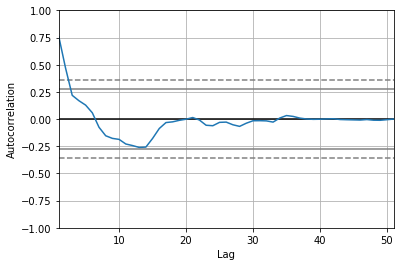

In [194]:
%matplotlib inline
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(mdl01['RAM'].dropna())

<B>Statsmodels Autocorrelation </B>
<br>lags = 1 for Week, lags = 4 for Month, lags = 12 for Quater, lags = 24 for Half yearly</br>
<br><b>Question:</b> for lags = 48, seasonality goes out of confident intvervel, Why? <br> 

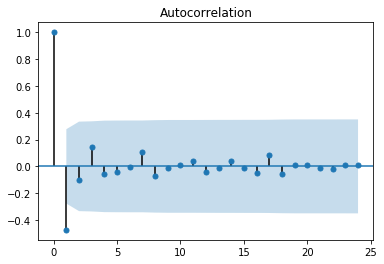

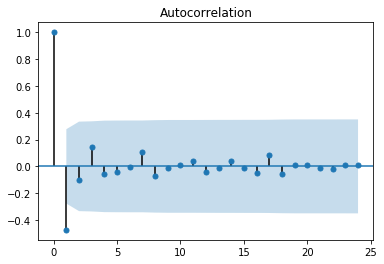

In [195]:
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(mdl01['RAM'].dropna(),lags=24) #lag=70 for seasanlity, lags =25
plot_acf(mdl01['CPU %'].dropna().diff(1).dropna(),lags=24) 

<b> Trend has been observed  as non-stationary, 'diff' of 1 used to make it stationary </b>
<br>Note:</br>
<br>Autocorrelation ~ 1 for lag 1, so we expect AR(1) should be between 0 and 1. If we observed a handful of random distributed spikes, a moving average modelwould be useful. </br>

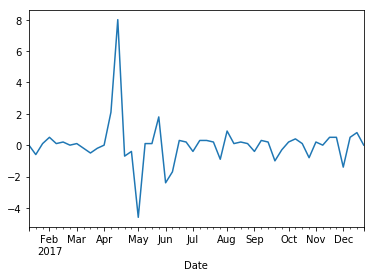

In [196]:
#mdl01['RAM'].dropna().plot()
mdl01['RAM'].dropna().diff(1).dropna().plot()

In [197]:
from statsmodels.tsa.arima_model import ARMA

mdl01r = mdl01[['RAM']].dropna().diff(1).dropna().astype(float)
model = ARMA(mdl01r, (1,0)).fit() # if coef is >1 then use diff, check this coef is ~ coef of autocorrlation
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    RAM   No. Observations:                   50
Model:                     ARMA(1, 0)   Log Likelihood                 -90.610
Method:                       css-mle   S.D. of innovations              1.482
Date:                Fri, 05 Jan 2018   AIC                            187.221
Time:                        19:42:09   BIC                            192.957
Sample:                    01-14-2017   HQIC                           189.405
                         - 12-23-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0578      0.231      0.250      0.803      -0.394       0.510
ar.L1.RAM      0.0937      0.139      0.672      0.505      -0.179       0.367
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           10.6710           +0.0000j           10.6710            0.0000
-----------------------------------------------------------------------------
"""

<b>Note:</b>
<br>1 . From the ARMA Model Result (AR=1, MA=0), it has been observed that 'RAM' coef is 0.767088 which is high, so 'diff' 1 used to maeke it stationary and P value is < .05 which is significant.</br>
<br> When diff =1 AR coef is 0.0937 and autocorrelation at lag 1 is 0.0955815435858</br>
<br><b>Check: in AR diff =2 then coef is .4962 and P value is 0.000, Ask WHY</b></br>

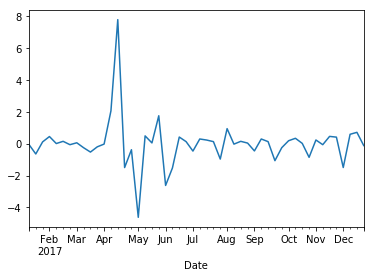

In [198]:
model.resid.plot()

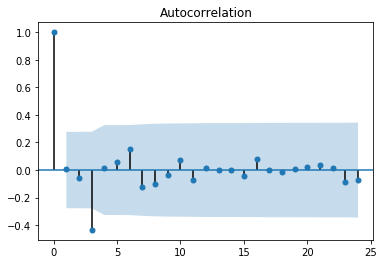

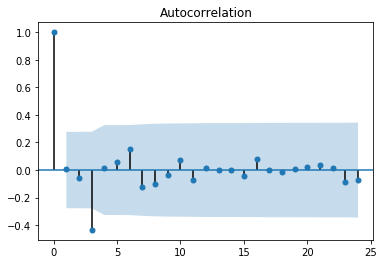

In [199]:
plot_acf(model.resid, lags=24)

In [200]:
#mdl01 = mdl01[['CPU %']].dropna().astype(float)
#model = ARMA(mdl01, (1, 1)).fit()
#model.summary()

In [201]:
mdl01m = mdl01[['RAM']].dropna().diff(1).dropna().astype(float)
model = ARMA(mdl01m, (0, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    RAM   No. Observations:                   50
Model:                     ARMA(0, 1)   Log Likelihood                 -90.587
Method:                       css-mle   S.D. of innovations              1.481
Date:                Fri, 05 Jan 2018   AIC                            187.174
Time:                        19:42:11   BIC                            192.911
Sample:                    01-14-2017   HQIC                           189.359
                         - 12-23-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0578      0.230      0.251      0.803      -0.393       0.508
ma.L1.RAM      0.0990      0.134      0.739      0.464      -0.164       0.362
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -10.1014           +0.0000j           10.1014            0.5000
-----------------------------------------------------------------------------
"""

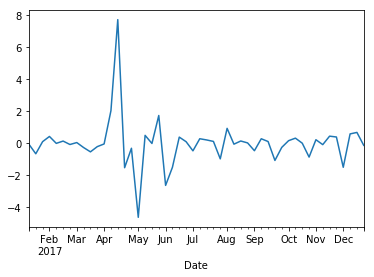

In [202]:
model.resid.plot()

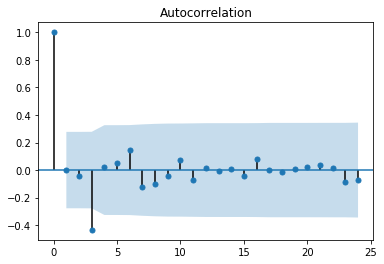

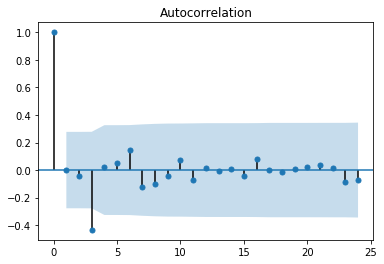

In [203]:
plot_acf(model.resid, lags=24)

<b>ARIMA</b>

In [208]:
from statsmodels.tsa.arima_model import ARIMA
mdl01 = mdl01[['RAM']].dropna().astype(float)
model = ARIMA(mdl01, (1, 1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.RAM   No. Observations:                   50
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -90.610
Method:                       css-mle   S.D. of innovations              1.482
Date:                Fri, 05 Jan 2018   AIC                            187.221
Time:                        19:44:37   BIC                            192.957
Sample:                    01-14-2017   HQIC                           189.405
                         - 12-23-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0578      0.231      0.250      0.803      -0.394       0.510
ar.L1.D.RAM     0.0937      0.139      0.672      0.505      -0.179       0.367
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           10.6710           +0.0000j           10.6710            0.0000
-----------------------------------------------------------------------------
"""

In [209]:
mdl01['RAM'].dropna().diff(1).autocorr(1)
#mdl01['CPU %'].dropna().autocorr(1)

0.095581543585832304

<b>Note:</b>
<br>From ARIMA (1,1,0) coef is -0.4645 and diff(1).autocorr(1) is -0.47366985707325149 which is not same <b>what it indicates,</b> P value is 0.000 which is significate </br>
<br>Check: 1. Does this model match the lag 1 autocorrelation of the differenced series? 2. Is the data stationary?</br>


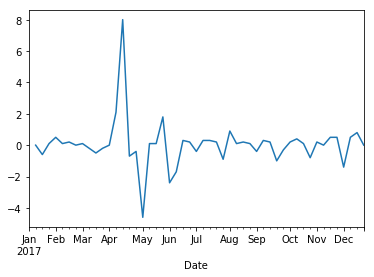

In [210]:
#model.resid.plot()
mdl01['RAM'].dropna().diff(1).plot()

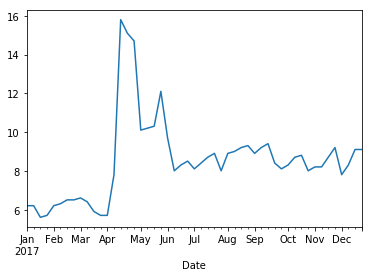

In [211]:
mdl01['RAM'].dropna().plot()

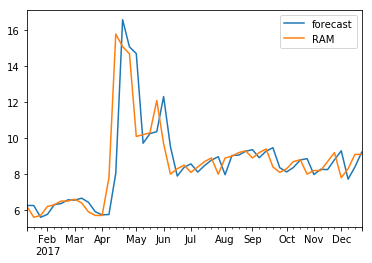

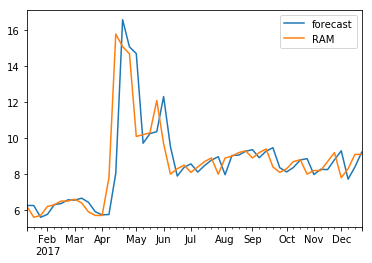

In [212]:
model.plot_predict(1, 50)

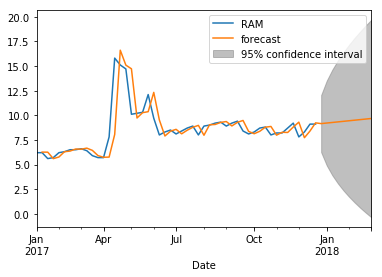

In [213]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdl01['RAM'].dropna().plot(ax=ax)
fig = model.plot_predict(1,60, ax=ax, plot_insample=False)